<a href="https://colab.research.google.com/github/hhhursh/ADS-LABS/blob/main/ADS_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

#Loading Data

In [ ]:
import yfinance as yf

ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-01-01'

df = yf.download(ticker, start=start_date, end=end_date)

print(df.head())
df.to_csv('stock_prices.csv')


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  73.059425  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.349136  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.925636  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.582657  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.750244  132079200


#Preprocessing The Data

In [ ]:
def preprocess_data(df, target_column, seq_len, train_split):
    data = df[target_column].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    x, y = [], []
    for i in range(seq_len, len(scaled_data)):
        x.append(scaled_data[i-seq_len:i, 0])
        y.append(scaled_data[i, 0])

    x, y = np.array(x), np.array(y)
    split_index = int(train_split * len(x))

    x_train, y_train = x[:split_index], y[:split_index]
    x_test, y_test = x[split_index:], y[split_index:]

    return x_train, y_train, x_test, y_test, scaler



In [ ]:
# Hyperparameters
sequence_length = 60
train_split = 0.8


x_train, y_train, x_test, y_test, scaler = preprocess_data(df, 'Close', sequence_length, train_split)

#LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

In [ ]:

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
5/5 [==============================] - 9s 482ms/step - loss: 0.1714 - val_loss: 0.0096
Epoch 2/20
5/5 [==============================] - 1s 107ms/step - loss: 0.0418 - val_loss: 0.0187
Epoch 3/20
5/5 [==============================] - 0s 101ms/step - loss: 0.0155 - val_loss: 0.0354
Epoch 4/20
5/5 [==============================] - 0s 101ms/step - loss: 0.0268 - val_loss: 0.0122
Epoch 5/20
5/5 [==============================] - 1s 104ms/step - loss: 0.0116 - val_loss: 0.0088
Epoch 6/20
5/5 [==============================] - 1s 111ms/step - loss: 0.0162 - val_loss: 0.0039
Epoch 7/20
5/5 [==============================] - 1s 106ms/step - loss: 0.0114 - val_loss: 0.0052
Epoch 8/20
5/5 [==============================] - 0s 99ms/step - loss: 0.0109 - val_loss: 0.0028
Epoch 9/20
5/5 [==============================] - 1s 105ms/step - loss: 0.0096 - val_loss: 0.0047
Epoch 10/20
5/5 [==============================] - 0s 101ms/step - loss: 0.0090 - val_loss: 0.0043
Epoch 11/20
5/5 [===

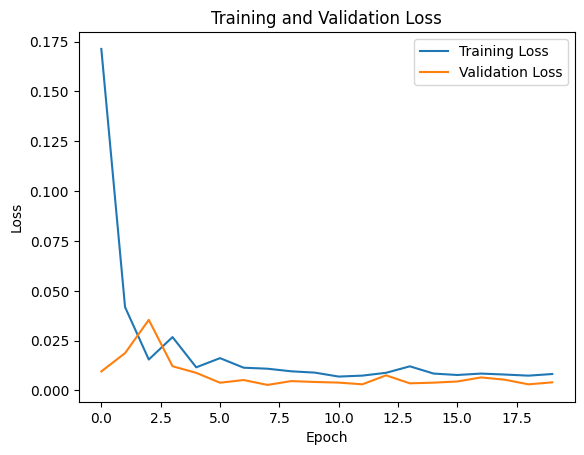

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

2/2 [==============================] - 2s 22ms/step


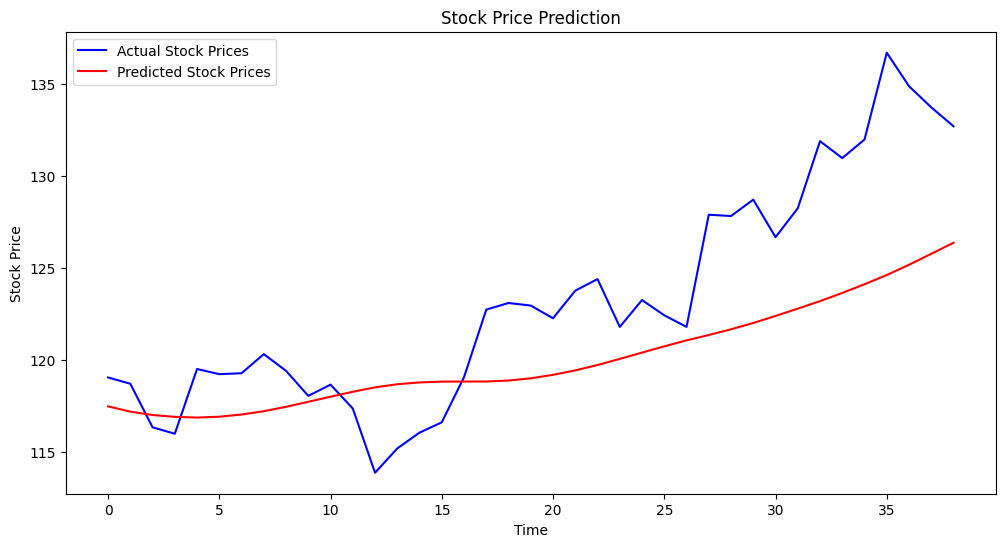

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Stock Prices')
plt.plot(predictions, color='red', label='Predicted Stock Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
